$H = \sum_{i} \left( S^z_i S^z_{i+1} + \frac{1}{2} (S^+_i S^-_{i+1} + S^-_i S^+_{i+1}) \right)$  for spin 1/2 system

In [3]:
#loading packages
import numpy as np
import time
import matplotlib.pyplot as plt


#introducing the spin system

#S_z=1/2 * (sigma)^z
Sz=np.array([[0.5,  0],
                [0,  -0.5]])

# S^+ = (1/2) * (sigma^x + i sigma^y)
Sp = np.array([[0, 1], 
               [0, 0]])

# S^- = (1/2) * (sigma^x - i sigma^y)
Sm = np.array([[0, 0], 
               [1, 0]])

# Identity matrix I_2
I = np.eye(2)


In [44]:
# parameters
Nit = 500 #no of iterations
D = 8 #bond length 
tol_deg = 1e-10 #setting cutoff 

site_list=[]
energy_list=[]

start_time = time.time()

for k in range (1,Nit+1):
    if k == 1:
        #introducing the left block called it S
        I_S=I
        H_S = I_S * 0
        #this is for when S get l
        Szborder_S=Sz
        Spborder_S=Sp
        Smborder_S=Sm


        #for the right block called it E
        I_E=I
        H_E=I_E*0
        Szborder_E=Sz
        Spborder_E=Sp
        Smborder_E=Sm

        #print(H_E,H_S)






    else:
        dim_L = np.shape(I_L)[0]
        dim_R = np.shape(I_R)[0]
        psi_mat=np.reshape(psi,(dim_L,dim_R))

        #define density matrix operator

        sigma_L=np.matmul(psi_mat,psi_mat.conj().T)     #matrix multiplication $\psi\psidaggar$
        vals_L , vecs_L=np.linalg.eigh(sigma_L)         #diagonalisation

        O_L=np.array(vecs_L[:,-1])          #keep largest number of eigenvalue on left
        for it in range(1,min(D,len(vals_L))):
            O_L = np.vstack([O_L, vecs_L[:,-1-it]]) #add more eigenvalues based on D
        lines_O_L=np.shape(O_L)[0]  # current number of basis states retained/no of states kept

        for it in range(lines_O_L,len(vals_L)):
            if abs(vals_L[-lines_O_L] - vals_L[-1-it]) < tol_deg:
                O_L = np.vstack([O_L, vecs_L[:,-1-it]])
            else:
                break


            # now repeat this steps for right block
        sigma_R = np.matmul(psi_mat.T,psi_mat.conj())
        vals_R,vecs_R = np.linalg.eigh(sigma_R)
        O_R = np.array(vecs_R[:,-1])
        for it in range(1,min(D,len(vals_R))):
            O_R = np.vstack([O_R, vecs_R[:,-1-it]])
       
        lines_O_R = np.shape(O_R)[0]
        for it in range(lines_O_R,len(vals_R)):
            if abs(vals_R[-lines_O_R] - vals_R[-1-it]) < tol_deg:
                O_R = np.vstack([O_R, vecs_R[:,-1-it]])
            else:
                break
            
        #S
        # I_S
        I_S = np.matmul(np.matmul(O_L,I_L),O_L.conj().T)
        # H_S
        H_S = np.matmul(np.matmul(O_L,H_L),O_L.conj().T)
        # relevant operators for S * l
        Szborder_S = np.matmul(np.matmul(O_L,Szborder_L),O_L.conj().T)
        Spborder_S = np.matmul(np.matmul(O_L,Spborder_L),O_L.conj().T)
        Smborder_S = np.matmul(np.matmul(O_L,Smborder_L),O_L.conj().T)

        # E
        # I_E
        I_E = np.matmul(np.matmul(O_R,I_R),O_R.conj().T)
        # H_E
        H_E = np.matmul(np.matmul(O_R,H_R),O_R.conj().T)
        # relevant operators for r * E
        Szborder_E = np.matmul(np.matmul(O_R,Szborder_R),O_R.conj().T)
        Spborder_E = np.matmul(np.matmul(O_R,Spborder_R),O_R.conj().T)
        Smborder_E = np.matmul(np.matmul(O_R,Smborder_R),O_R.conj().T)



    # L = S * l
    # I_L
    I_L = np.kron(I_S,I)
    # H_L
    H_L = np.kron(H_S,I) #H_S * I_l
    #I_S * H_l = 0
    H_L += np.kron(Szborder_S,Sz) + 0.5*( np.kron(Spborder_S,Sm) + np.kron(Smborder_S,Sp)) 
    # relevant operators for L * R
    Szborder_L = np.kron(I_S,Sz)
    Spborder_L = np.kron(I_S,Sp)
    Smborder_L = np.kron(I_S,Sm)
        
    # R = r * E
    # I_R
    I_R = np.kron(I,I_E)
    # H_R
    #H_r * I_E = 0
    H_R = np.kron(I,H_E) #I_r * H_E
    H_R += np.kron(Sz,Szborder_E) + 0.5*( np.kron(Sp,Smborder_E) + np.kron(Sm,Spborder_E)) 
    # relevant operators for L * R
    Szborder_R = np.kron(Sz,I_E)
    Spborder_R = np.kron(Sp,I_E)
    Smborder_R = np.kron(Sm,I_E)
        
    #SB = L * R
    # H_SB
    H_SB = np.kron(H_L,I_R) #H_L * I_R
    H_SB += np.kron(I_L,H_R) #I_L * H_R
    H_SB += np.kron(Szborder_L,Szborder_R) + 0.5*( np.kron(Spborder_L,Smborder_R) + np.kron(Smborder_L,Spborder_R)) 

    # diagonalization
    En,psin = np.linalg.eigh(H_SB)
    # psi for density matrix
    psi = psin[:,0]
       
    # outputs

    Nsites = 2+2*k
    print('#sites = ', Nsites)
    site_list.append(Nsites)
    Egs = En[0]
    print('GS energy per site =', Egs/Nsites)
    energy_list.append(En[0] / Nsites)
    print('dim of SB = ', np.shape(H_SB)[0])
    print('time of iteration (s) = ', time.time() - start_time)
    start_time = time.time()
    print('\n')



#sites =  4
GS energy per site = -0.40400635094610965
dim of SB =  16
time of iteration (s) =  0.0011205673217773438


#sites =  6
GS energy per site = -0.41559618898132106
dim of SB =  64
time of iteration (s) =  0.0012323856353759766


#sites =  8
GS energy per site = -0.42186657483598633
dim of SB =  256
time of iteration (s) =  0.0039021968841552734


#sites =  10
GS energy per site = -0.4258022489154695
dim of SB =  256
time of iteration (s) =  0.007150888442993164


#sites =  12
GS energy per site = -0.42850477810960874
dim of SB =  256
time of iteration (s) =  0.004354238510131836


#sites =  14
GS energy per site = -0.43047345061433884
dim of SB =  256
time of iteration (s) =  0.004362821578979492


#sites =  16
GS energy per site = -0.4319731747770691
dim of SB =  256
time of iteration (s) =  0.004117488861083984


#sites =  18
GS energy per site = -0.4331506094209854
dim of SB =  256
time of iteration (s) =  0.004591941833496094


#sites =  20
GS energy per site = -0.43410211

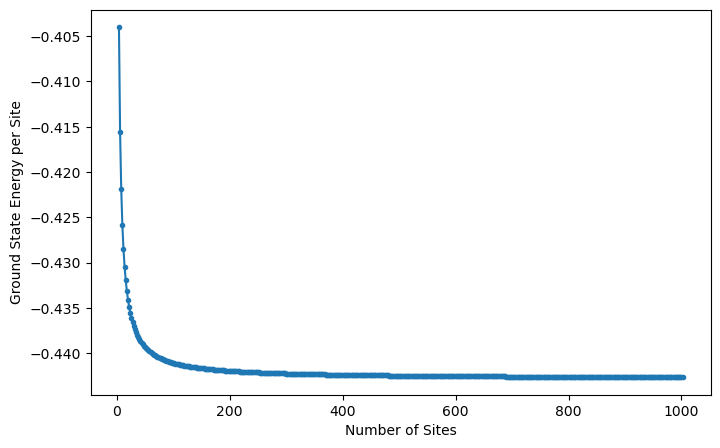

In [45]:
    
plt.figure(figsize=(8, 5))
plt.plot(site_list,energy_list, marker=".")
plt.xlabel("Number of Sites")
plt.ylabel("Ground State Energy per Site")
plt.show()